# Author- Shadan Ansari

## Data Science intern at Letsgrowmore

## Batch: December 2021

## Task3: Prediction using Decision Tree Algorithm

## Aim: Create the Decision Tree classifier and visualize it graphically

## Level: Intermediate

## Dataset Link:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view


## Importing all necessary libraries to perform the task

In [1]:
import numpy as np
import pandas as pd
import sklearn.metrics as sm
import seaborn as sns
import matplotlib.pyplot as mt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

### Now importing the iris data set

In [2]:
data=pd.read_csv("Iris.csv")
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Getting the size of the iris_Data

In [3]:
data_size= data.shape
print(f"Number of Rows : {data_size[0]}") 
print(f"Number of Columns : {data_size[1]}")

Number of Rows : 150
Number of Columns : 6


### Checking the Information of the iris_Data.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Checking the null values.

In [5]:
data.isnull()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
145,False,False,False,False,False,False
146,False,False,False,False,False,False
147,False,False,False,False,False,False
148,False,False,False,False,False,False


In [6]:
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Describing the Statistical measures of the Dataset.

In [7]:
df=data.drop('Id', axis=1)
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data Preparation

In [8]:
target=data['Species']
df=data.copy()
df=data.drop('Species', axis=1)
data.shape

(150, 6)

In [9]:
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape


(150, 6)

### Splitting dataset into Train and Test sets.

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


### After Splitting data into  test and train now going to defining the decision tree algorithm.

In [11]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


### After making decision tree classifier now create classification report and confusion matrix.

In [12]:
y_pred=decision_tree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [13]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))


Accuracy: 1.0


### For this model, the accuracy on the test set is 1, i.e,  100%,
### which means the model made the right prediction for 100% of the Iris in the given dataset.

### Now creating Confusion metrix

In [14]:
import numpy as np
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

### Now visualizing the trained model that we have created.

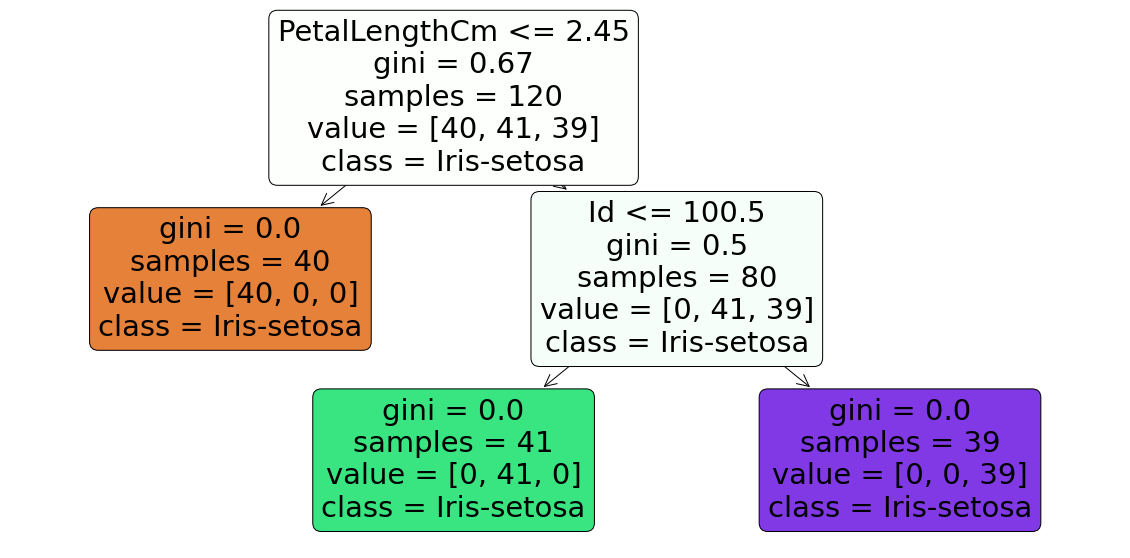

In [15]:
mt.figure(figsize=(20,10))
tree=plot_tree(decision_tree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)